# Load data to Netflix TV Shows and Movies

This notebook provides step by step instructions for ingesting 'Netflix TV Shows and Movies.csv' file to a database.

Start by creating a table to store the ingested data:

In [11]:
%%sql
USE pavans_database;
CREATE TABLE pavans_database.`Netflix TV Shows and Movies` (
	`index` bigint(20) NULL,
	`id` text CHARACTER SET utf8 COLLATE utf8_general_ci NULL,
	`title` text CHARACTER SET utf8 COLLATE utf8_general_ci NULL,
	`type` text CHARACTER SET utf8 COLLATE utf8_general_ci NULL,
	`description` text CHARACTER SET utf8 COLLATE utf8_general_ci NULL,
	`release_year` bigint(20) NULL,
	`age_certification` text CHARACTER SET utf8 COLLATE utf8_general_ci NULL,
	`runtime` bigint(20) NULL,
	`imdb_id` text CHARACTER SET utf8 COLLATE utf8_general_ci NULL,
	`imdb_score` double NULL,
	`imdb_votes` double NULL,
	 SHARD KEY ()
);

++
||
++
++

# Create a pipeline that will load file into the database
### [Learn about Load Data with Pipeline through our documentation](https://docs.singlestore.com/managed-service/en/load-data/load-data-with-pipelines.html)

In [12]:
%%sql
USE pavans_database;
CREATE PIPELINE pavans_database.`Netflix TV Shows and Movies`
AS LOAD DATA STAGE 'Netflix TV Shows and Movies.csv'
BATCH_INTERVAL 2500
DISABLE OUT_OF_ORDER OPTIMIZATION
DISABLE OFFSETS METADATA GC
SKIP DUPLICATE KEY ERRORS -- SKIP ALL ERRORS can be used to skip all errors that can be tracked through "Monitor the pipeline for errors"
INTO TABLE `Netflix TV Shows and Movies`
FIELDS TERMINATED BY ',' ENCLOSED BY '"' ESCAPED BY '\\' 
LINES TERMINATED BY '\n' STARTING BY '' 
IGNORE 1 LINES
FORMAT CSV
(
	`Netflix TV Shows and Movies`.`index`,
	`Netflix TV Shows and Movies`.`id`,
	`Netflix TV Shows and Movies`.`title`,
	`Netflix TV Shows and Movies`.`type`,
	`Netflix TV Shows and Movies`.`description`,
	`Netflix TV Shows and Movies`.`release_year`,
	`Netflix TV Shows and Movies`.`age_certification`,
	`Netflix TV Shows and Movies`.`runtime`,
	`Netflix TV Shows and Movies`.`imdb_id`,
	`Netflix TV Shows and Movies`.`imdb_score`,
	`Netflix TV Shows and Movies`.`imdb_votes`
);

++
||
++
++

# Start the pipeline

In [13]:
%%sql
START PIPELINE pavans_database.`Netflix TV Shows and Movies`;

++
||
++
++

# Monitor the pipeline for errors

In [14]:
%%sql
USE pavans_database;
SELECT * FROM information_schema.pipelines_errors
WHERE pipeline_name ='Netflix TV Shows and Movies';

DATABASE_NAME,PIPELINE_NAME,ERROR_UNIX_TIMESTAMP,ERROR_TYPE,ERROR_CODE,ERROR_MESSAGE,ERROR_KIND,STD_ERROR,LOAD_DATA_LINE,LOAD_DATA_LINE_NUMBER,BATCH_ID,ERROR_ID,BATCH_SOURCE_PARTITION_ID,BATCH_EARLIEST_OFFSET,BATCH_LATEST_OFFSET,HOST,PORT,PARTITION


# Check that the data has loaded

In [25]:
%%sql
SELECT * FROM pavans_database.`Netflix TV Shows and Movies`
LIMIT 100;

index,id,title,type,description,release_year,age_certification,runtime,imdb_id,imdb_score,imdb_votes
50,tm2386,A Nightmare on Elm Street,MOVIE,"Teenagers in a small town are dropping like flies, apparently in the grip of mass hysteria causing their suicides. A cop's daughter, Nancy Thompson, traces the cause to child molester Fred Krueger, who was burned alive by angry parents many years before. Krueger has now come back in the dreams of his killers' children, claiming their lives as his revenge. Nancy and her boyfriend, Glen, must devise a plan to lure the monster out of the realm of nightmares and into the real world...",1984,R,91,tt0087800,7.4,230543.0
108,tm192405,Gattaca,MOVIE,"In a future society in the era of indefinite eugenics, humans are set on a life course depending on their DNA. Young Vincent Freeman is born with a condition that would prevent him from space travel, yet is determined to infiltrate the GATTACA space program.",1997,PG-13,106,tt0119177,7.8,298168.0
144,tm8446,Teenage Mutant Ninja Turtles II: The Secret of the Ooze,MOVIE,"The Turtles and the Shredder battle once again, this time for the last cannister of the ooze that created the Turtles, which Shredder wants to create an army of new mutants.",1991,PG,88,tt0103060,6.0,55499.0
170,tm188970,Bill Hicks: Revelations,MOVIE,"Bill Hicks in the height of his genius. Recorded at the Dominion Theatre in London, Hicks opens our eyes and minds to the hypocrisy and ludicrousness of the world around us.",1993,,74,tt0152183,8.5,3085.0
356,tm89684,New York Minute,MOVIE,"Top student Jane Ryan heads to Manhattan for a college-scholarship competition. Her rebellious twin Roxy Ryan goes along to crash a video shoot. But anything can happen - and does - in a romp involving a pursuing truant officer, a smuggler, hunkalicious guys and the girls' realization that when the chips are down, a sister can be the best friend of all.",2004,PG,87,tt0363282,4.8,23307.0
452,tm150521,Accident,MOVIE,"A self-styled accident choreographer, the Brain is a professional hitman who kills his victims by trapping them in well crafted accidents that look like unfortunate mishaps. When the team's next assignment goes disastrously wrong, Brain begins to suspect that someone else has planned an â€˜accidentâ€™ on them.",2009,R,89,tt1202514,6.6,3284.0
488,tm47325,2 Alone in Paris,MOVIE,"A bumbling Paris policeman is doggedly determined to capture the master thief that repeatedly eludes him, even when they're the last two men on Earth.",2008,,94,tt1077097,5.4,2482.0
852,ts39465,Yours Fatefully,SHOW,"Yours Fatefully is a Singaporean Chinese drama which was telecasted on Singapore's free-to-air channel, MediaCorp Channel 8. It will make its debut on 29 May 2012. This drama serial consists of 20 episodes, and will be screened on every weekday night at 9:00 pm.",2012,TV-14,44,tt7131690,6.8,14.0
873,tm148147,Big Eyes,MOVIE,"The story of the awakening of painter, Margaret Keane, her phenomenal success in the 1950s, and the subsequent legal difficulties she had with her husband, who claimed credit for her works in the 1960s.",2014,PG-13,106,tt1126590,7.2,51.0
904,tm237143,Shrek the Musical,MOVIE,Shrek The Musical is a musical with music by Jeanine Tesori and book and lyrics by David Lindsay-Abaire. It is based on the 2001 DreamWorks Animation's film Shrek and William Steig's 1990 book Shrek! It was nominated for 8 Tony Awards including Best Musical.,2013,PG-13,130,tt3070936,6.9,3634.0


# SQL Queries for Simple Analysis

## Count the Number of Movies and TV Shows in Your Database.

In [39]:
%%sql
SELECT type, COUNT(*) AS count
FROM `Netflix TV Shows and Movies`
GROUP BY type;


type,count
SHOW,1876
MOVIE,3407


## Average IMDb Score for Each Content Type

In [43]:
%%sql
SELECT type, AVG(imdb_score) AS average_score
FROM `Netflix TV Shows and Movies`
WHERE imdb_score IS NOT NULL
GROUP BY type;

type,average_score
SHOW,7.017377398720684
MOVIE,6.2669797475785165


# Runtime Analysis

## Average Runtime by Content Type

In [55]:
%%sql
SELECT type, AVG(runtime) AS average_runtime
FROM `Netflix TV Shows and Movies`
WHERE runtime IS NOT NULL
GROUP BY type;


type,average_runtime
SHOW,38.6327
MOVIE,101.5374


## Runtime Distribution

In [56]:
%%sql
SELECT MIN(runtime) AS min_runtime, 
       MAX(runtime) AS max_runtime, 
       AVG(runtime) AS avg_runtime 
FROM `Netflix TV Shows and Movies`
WHERE runtime IS NOT NULL;


min_runtime,max_runtime,avg_runtime
0,235,79.1999


# Release Year Trends Analysis

## Content Count by Release Year

In [57]:
%%sql
SELECT release_year, COUNT(*) AS count
FROM `Netflix TV Shows and Movies`
GROUP BY release_year
ORDER BY release_year;


release_year,count
1953,1
1954,2
1956,1
1958,1
1959,1
1960,1
1961,1
1962,1
1963,1
1964,1


## Average IMDb Score by Release Year

In [58]:
%%sql
SELECT release_year, AVG(imdb_score) AS average_score
FROM `Netflix TV Shows and Movies`
WHERE imdb_score IS NOT NULL
GROUP BY release_year
ORDER BY release_year;


release_year,average_score
1953,6.8
1954,7.45
1956,6.7
1958,7.5
1959,6.7
1960,6.4
1961,7.5
1962,6.8
1963,7.6
1964,7.8


# Let's Visualize the Trends in Our Data

### First, ensure you have the necessary libraries installed:

In [64]:
!pip install pandas matplotlib seaborn

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/92/1a/cd3e0c90d1a763ad90073e13b189b4702f11becf4e71dbbad70a7a149811/matplotlib-3.8.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/e2/83/29a63bbc72839cc6b24b5a0e3d004d4ed4e8439f26460ad9a34e39251904/contourpy-1.2.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/pack

## Runtime Analysis Visualization

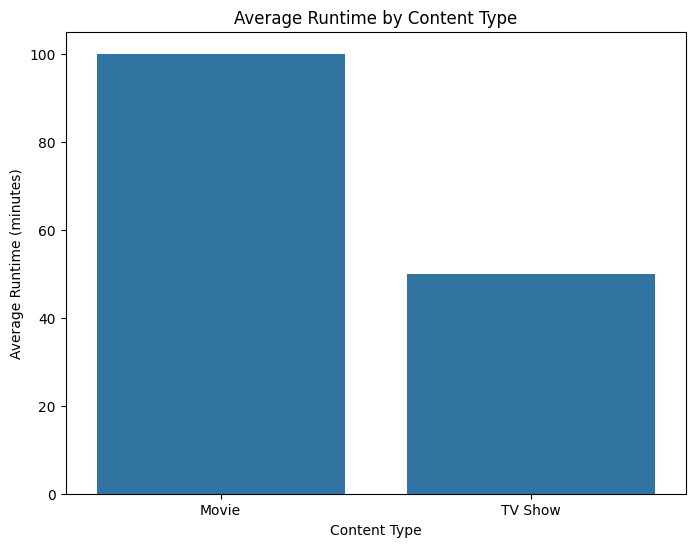

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace this with your actual data query results
runtime_data = pd.DataFrame({
    'type': ['Movie', 'TV Show'],
    'average_runtime': [100, 50]
})

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='type', y='average_runtime', data=runtime_data)
plt.title('Average Runtime by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Average Runtime (minutes)')
plt.show()


## Release Year Trends Analysis Visualization

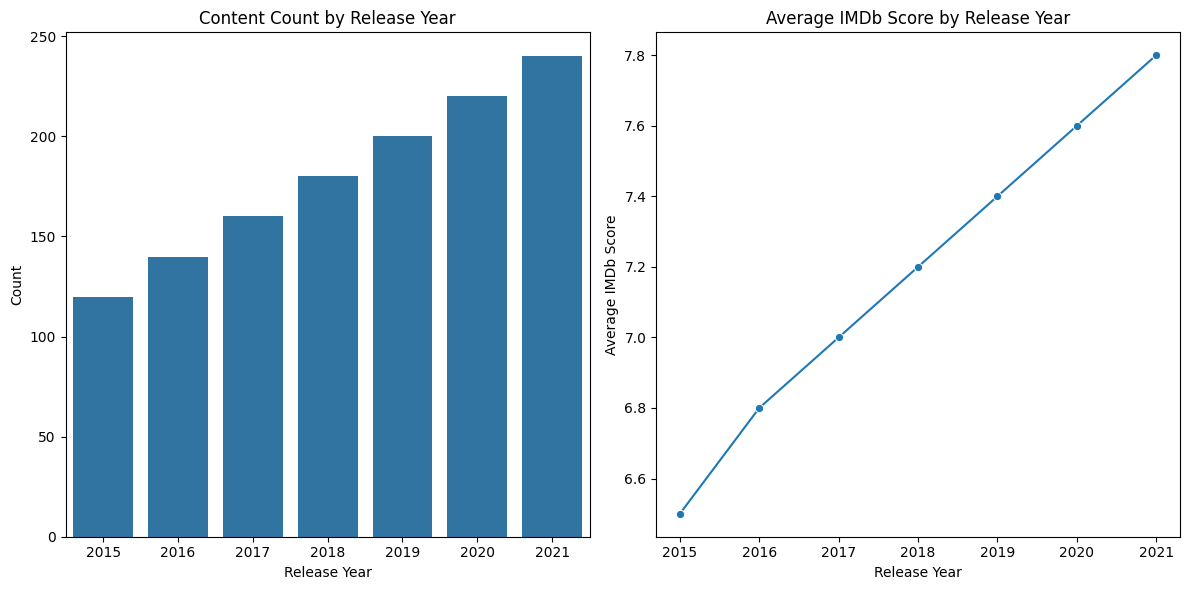

In [74]:
# Replace these with your actual data query results
release_year_data = pd.DataFrame({
    'release_year': [2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'count': [120, 140, 160, 180, 200, 220, 240],
    'average_score': [6.5, 6.8, 7.0, 7.2, 7.4, 7.6, 7.8]
})

# Plotting
plt.figure(figsize=(12, 6))

# Count by Release Year
plt.subplot(1, 2, 1)
sns.barplot(x='release_year', y='count', data=release_year_data)
plt.title('Content Count by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Count')

# Average IMDb Score by Release Year
plt.subplot(1, 2, 2)
sns.lineplot(x='release_year', y='average_score', data=release_year_data, marker='o')
plt.title('Average IMDb Score by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average IMDb Score')

plt.tight_layout()
plt.show()


## Highest Rated Movies Released in 2021

In [93]:
%%sql
SELECT title, imdb_score
FROM `Netflix TV Shows and Movies`
WHERE type = 'Movie' AND release_year = 2021 AND imdb_score IS NOT NULL
ORDER BY imdb_score DESC
LIMIT 10;

title,imdb_score
Bo Burnham: Inside,8.699999999999998
In Our Mothers' Gardens,8.6
Love is Color Blind,8.3
Seaspiracy,8.1
Minnal Murali,8.1
Nayattu,8.1
Dave Chappelle: The Closer,8.0
Cinema Bandi,8.0
The Alpinist,8.0
Like A Rolling Stone: The Life & Times of Ben Fong-Torres,7.9


## Lowest Rated Movies Released in 2020

In [99]:
%%sql
SELECT title, imdb_score
FROM `Netflix TV Shows and Movies`
WHERE type = 'Movie' AND release_year = 2020 AND imdb_score IS NOT NULL
ORDER BY imdb_score ASC
LIMIT 10;


title,imdb_score
Me Against You: Mr. S's Vendetta,1.7
Bobbleheads: The Movie,2.4
Holiday on Mars,2.7
Dark Forces,2.7
Ni de coÃ±a,2.8
Jiu Jitsu,2.9
Small Chops,2.9
Indoo Ki Jawani,3.0
Asura Guru,3.2
An Unremarkable Christmas,3.2


## Top Movies

In [105]:
%%sql
SELECT title, release_year, imdb_score
FROM `Netflix TV Shows and Movies`
WHERE type = 'Movie' AND imdb_score IS NOT NULL
ORDER BY imdb_score DESC
LIMIT 10;


title,release_year,imdb_score
C/o Kancharapalem,2018,9.0
Chhota Bheem & Krishna in Mayanagari,2011,9.0
No Longer Kids,1979,9.0
David Attenborough: A Life on Our Planet,2020,9.0
Forrest Gump,1994,8.8
Sky Tour: The Movie,2020,8.8
Inception,2010,8.8
Bye Bye London,1982,8.699999999999998
Bo Burnham: Inside,2021,8.699999999999998
Anbe Sivam,2003,8.699999999999998


## Top TV Shows

In [106]:
%%sql
SELECT title, release_year, imdb_score
FROM `Netflix TV Shows and Movies`
WHERE type = 'TV Show' AND imdb_score IS NOT NULL
ORDER BY imdb_score DESC
LIMIT 10;


title,release_year,imdb_score


## Visualize Data in Python

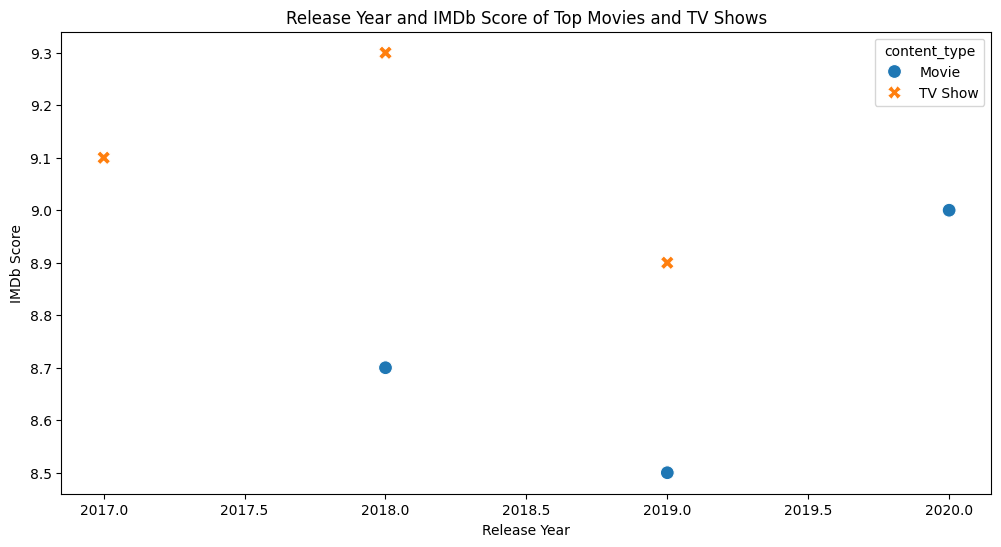

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data frames (replace these with your actual data frames from the queries)
top_movies = pd.DataFrame({
    'title': ['Movie A', 'Movie B', 'Movie C'],  # Replace with actual titles
    'release_year': [2019, 2018, 2020],  # Replace with actual years
    'imdb_score': [8.5, 8.7, 9.0]  # Replace with actual scores
})

top_tv_shows = pd.DataFrame({
    'title': ['TV Show A', 'TV Show B', 'TV Show C'],  # Replace with actual titles
    'release_year': [2017, 2019, 2018],  # Replace with actual years
    'imdb_score': [9.1, 8.9, 9.3]  # Replace with actual scores
})

# Combine data frames for visualization
combined_data = pd.concat([top_movies.assign(content_type='Movie'), 
                           top_tv_shows.assign(content_type='TV Show')])

# Visualization
plt.figure(figsize=(12, 6))
sns.scatterplot(data=combined_data, x='release_year', y='imdb_score', hue='content_type', style='content_type', s=100)
plt.title('Release Year and IMDb Score of Top Movies and TV Shows')
plt.xlabel('Release Year')
plt.ylabel('IMDb Score')
plt.show()


# Distribution of IMDb Scores

### Prepare Your Data

In [121]:
%%sql
SELECT imdb_score
FROM `Netflix TV Shows and Movies`
WHERE imdb_score IS NOT NULL;

imdb_score
7.4
7.8
6.0
8.5
4.8
6.6
5.4
6.8
7.2
6.9


#### Visualize the Distribution of IMDb Scores

/tmp/ipykernel_62/1848218271.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_scores['imdb_score'], shade=True)


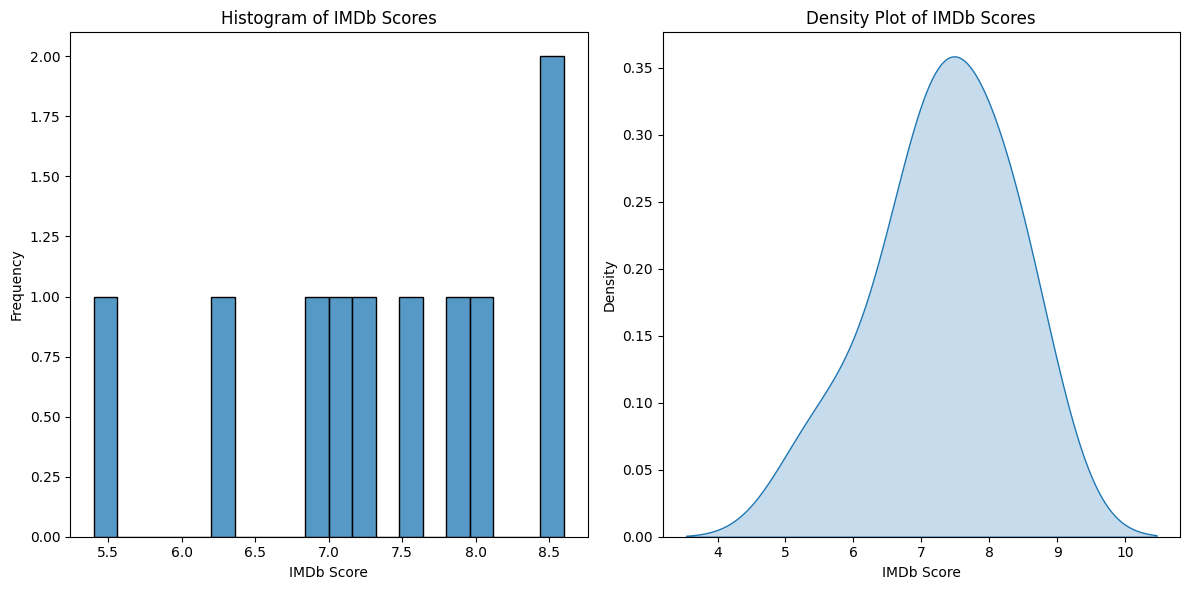

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame (replace with your actual DataFrame from the query)
df_scores = pd.DataFrame({
    'imdb_score': [7.2, 8.5, 6.9, 7.8, 5.4, 8.0, 6.3, 7.1, 8.6, 7.5]  # Replace with actual IMDb scores
})

# Visualization
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df_scores['imdb_score'], bins=20, kde=False)
plt.title('Histogram of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')

# Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(df_scores['imdb_score'], shade=True)
plt.title('Density Plot of IMDb Scores')
plt.xlabel('IMDb Score')
plt.ylabel('Density')

plt.tight_layout()
plt.show()


# Heatmap Analysis

#### To create a heatmap, you typically need a dataset that contains several variables (columns) so you can visualize the correlation or relationship between them. A common use for a heatmap in a dataset like yours (IMDb data) is to visualize the correlation between different numeric features such as imdb_score, runtime, release_year, and any other numerical columns you might have. Here's a generic example of how you can create a heatmap using Python's Seaborn and Matplotlib libraries. First, ensure you have the necessary libraries:

In [134]:
!pip install pandas seaborn matplotlib

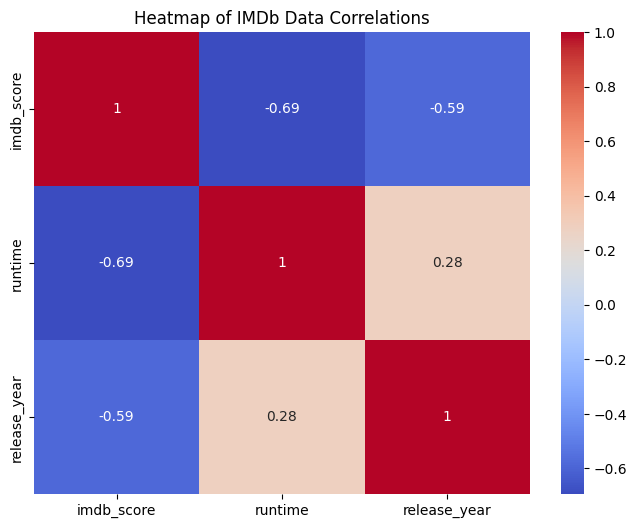

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame - replace this with your actual DataFrame
# Assuming these columns are in your DataFrame
data = {
    'imdb_score': [7.2, 8.5, 6.9, 7.8, 5.4],
    'runtime': [120, 90, 150, 110, 130],
    'release_year': [2015, 2016, 2017, 2018, 2019],
    # Add more numeric columns if available
}
df = pd.DataFrame(data)

# Calculating the correlation matrix
corr = df.corr()

# Creating a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of IMDb Data Correlations')
plt.show()


As we conclude our exploration of the 'Netflix TV Shows and Movies' dataset, it's evident how data analysis can unlock a wealth of insights into the entertainment industry. We've journeyed through various aspects of the dataset, from the distribution of content types to the trends in IMDb scores over time, revealing the dynamic landscape of film and television. This analysis not only provides a deeper understanding of Netflix's vast library but also demonstrates the power of data analysis in transforming raw information into meaningful knowledge. Whether you're a data enthusiast or a film buff, the skills and methods we've discussed can be your tools for uncovering hidden stories in any dataset. 